In [1]:
import geopandas as gp
import pandas as pd
import maup
import numpy as np

# Richmond Virginia Precinct Analysis

We were asked by a reporter to create data files for Richmond, Virginia's precincts. The source for the 2023 data was the Virginia Department of Elections file [here](https://www.elections.virginia.gov/casting-a-ballot/redistricting/gis/) and the 2021 files from this [file](https://redistrictingdatahub.org/dataset/vest-2021-virginia-precinct-boundaries-and-election-results-shapefile/) on our website via VEST. 2020 Richmond precincts also from the '20 VEST file and appear unchanged from 2021.

In [2]:
def create_demo_columns(dataframe):
    
    #Non-Hispanic White
    dataframe["OMB_1"]=dataframe["P0020005"]
    
    #Non-Hispanic Black plus Non-Hispanic Black and White
    dataframe["OMB_2"]=(dataframe["P0020006"]+dataframe["P0020013"])
    
    #Non-Hispanic Asian plus Non-Hispanic Asian and White
    dataframe["OMB_3"]=(dataframe["P0020008"]+dataframe["P0020015"])
    
    #Non-Hispanic American Indian plus Non-Hispanic American Indian and White
    dataframe["OMB_4"]=(dataframe["P0020007"]+dataframe["P0020014"])
    
    #Non-Hispanic Pacific Islander plus Non-Hispanic Pacific Islander and White
    dataframe["OMB_5"]=(dataframe["P0020009"]+dataframe["P0020016"])
    
    #Non-Hispanic Some Other Race plus Non-Hispanic Some Other Race and White
    dataframe["OMB_6"]=(dataframe["P0020010"]+dataframe["P0020017"])
    
    #Non-Hispanic Other multiple-race(where more than one minority race is listed)
    dataframe["OMB_7"]=(dataframe["P0020011"]-dataframe["P0020013"]-dataframe["P0020014"]-dataframe["P0020015"]-dataframe["P0020016"]-dataframe["P0020017"])
    
    #Hispanic
    dataframe["OMB_8"]=dataframe["P0020002"]
    
    return dataframe


def format_percentages(dataframe, col_list):
    for col_name in col_list:
        dataframe[col_name] = dataframe[col_name].map('{:.1%}'.format)
    return dataframe

def create_demo_columns_pct(dataframe, format_df = False):
    
    #Non-Hispanic White
    dataframe["OMB_1_pct"]=np.where(dataframe["P0010001"]==0,0,dataframe["P0020005"]/dataframe["P0010001"])
    
    #Non-Hispanic Black plus Non-Hispanic Black and White
    dataframe["OMB_2_pct"]=np.where(dataframe["P0010001"]==0,0,(dataframe["P0020006"]+dataframe["P0020013"])/dataframe["P0010001"])
    
    #Non-Hispanic Asian plus Non-Hispanic Asian and White
    dataframe["OMB_3_pct"]=np.where(dataframe["P0010001"]==0,0,(dataframe["P0020008"]+dataframe["P0020015"])/dataframe["P0010001"])
    
    #Non-Hispanic American Indian plus Non-Hispanic American Indian and White
    dataframe["OMB_4_pct"]=np.where(dataframe["P0010001"]==0,0,(dataframe["P0020007"]+dataframe["P0020014"])/dataframe["P0010001"])
    
    #Non-Hispanic Pacific Islander plus Non-Hispanic Pacific Islander and White
    dataframe["OMB_5_pct"]=np.where(dataframe["P0010001"]==0,0,(dataframe["P0020009"]+dataframe["P0020016"])/dataframe["P0010001"])
    
    #Non-Hispanic Some Other Race plus Non-Hispanic Some Other Race and White
    dataframe["OMB_6_pct"]=np.where(dataframe["P0010001"]==0,0,(dataframe["P0020010"]+dataframe["P0020017"])/dataframe["P0010001"])
    
    #Non-Hispanic Other multiple-race(where more than one minority race is listed)
    dataframe["OMB_7_pct"]=np.where(dataframe["P0010001"]==0,0,(dataframe["P0020011"]-dataframe["P0020013"]-dataframe["P0020014"]-dataframe["P0020015"]-dataframe["P0020016"]-dataframe["P0020017"])/dataframe["P0010001"])
    
    #Hispanic
    dataframe["OMB_8_pct"]=np.where(dataframe["P0010001"]==0,0,dataframe["P0020002"]/dataframe["P0010001"])
    
    if format_df:
        return format_percentages(dataframe, [i for i in dataframe if "OMB" in i and "_pct" in i])
    else:
        return dataframe

## Load and Filter Files

In [3]:
BLOCK_PATH = ""

In [4]:
va_blocks = gp.read_file(BLOCK_PATH)
va_blocks = va_blocks[va_blocks["COUNTYFP20"]=="760"]
va_blocks.index = va_blocks["GEOID20"]

richmond = gp.read_file("./raw-from-source/Richmond_City/Richmond_City.shp")
richmond = richmond.to_crs(va_blocks.crs)
richmond.index = richmond["PrcnctFIPS"]

va_21 = gp.read_file("./raw-from-source/va_vest_21/va_vest_21.shp")
va_20 = gp.read_file("./raw-from-source/va_vest_20/va_vest_20.shp")

va_21 = va_21[va_21["COUNTYFP"]=="760"]
va_21.index = va_21["VTDST"]

va_20 = va_20[va_20["COUNTYFP"]=="760"]
va_20.index = va_20["VTDST"]

## Generate block assignments to '20, '21, and '23 precincts

In [5]:
assignment_23 = maup.assign(va_blocks, richmond)
assignment_21 = maup.assign(va_blocks, va_21)
assignment_20 = maup.assign(va_blocks, va_20)

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:15: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it on

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages

In [6]:
# Note: The 2020 precincts are equal to the 2021 precincts
assignment_20.equals(assignment_21)

True

## Clean and Join the '21 and '23 Assignments Together

In [7]:
assignment_21 = pd.DataFrame(assignment_21)
assignment_21.reset_index(inplace = True, drop = False)
assignment_21.rename(columns = {0:"PREC_21"}, inplace = True)

assignment_23 = pd.DataFrame(assignment_23)
assignment_23.reset_index(inplace = True, drop = False)
assignment_23.rename(columns = {0:"PREC_23"}, inplace = True)

joins = pd.merge(assignment_21, assignment_23, how = "outer", on = "GEOID20", indicator = True)
joins.drop("_merge", axis = 1, inplace = True)

## Add PL demographic data, filter columns and export file

In [8]:
BLOCK_CSV_PATH = ""

In [9]:
va_pl = pd.read_csv(BLOCK_CSV_PATH)
va_pl["GEOID20"] = va_pl["GEOID20"].astype(str)

comb = pd.merge(joins, va_pl, how = "left", on = "GEOID20")
keep_cols = ["GEOID20", 'PREC_21', 'PREC_23'] + [i for i in comb.columns if i[0:3]=="P00"]
comb = comb[keep_cols]
comb.to_csv("./richomd_va_pl_2020_full_data.csv", index = False)

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_93762/1932501836.py:1: DtypeWarning: Columns (29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  va_pl = pd.read_csv(BLOCK_CSV_PATH)


## Create a map of blocks with differing precinct assignments

In [10]:
differences = comb[comb["PREC_21"]!=comb["PREC_23"]]
va_blocks.reset_index(inplace = True, drop = True)
differences_shape = gp.GeoDataFrame(pd.merge(differences, va_blocks, how = "left", on = "GEOID20"))
merged = va_blocks.dissolve("COUNTYFP20")

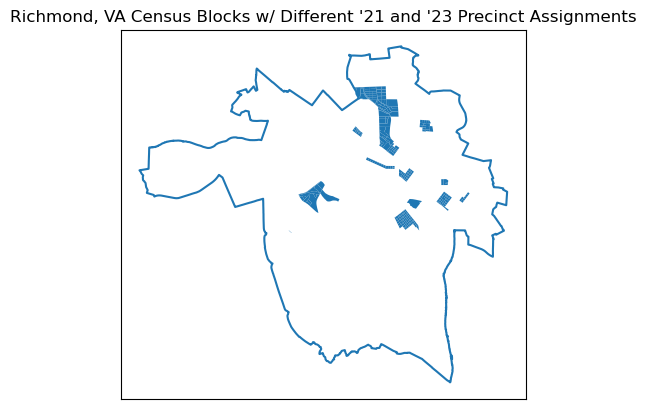

In [11]:
ax = merged.boundary.plot()
differences_shape.plot(ax = ax)
ax.set_title("Richmond, VA Census Blocks w/ Different '21 and '23 Precinct Assignments")

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

## Create and export files with precinct-level data

In [12]:
prec_23 = comb.groupby("PREC_23").sum()
prec_23.reset_index(inplace = True, drop = False)

prec_21 = comb.groupby("PREC_21").sum()
prec_21.reset_index(inplace = True, drop = False)

prec_23 = create_demo_columns_pct(prec_23, format_df = True)
prec_23 = create_demo_columns(prec_23)

prec_21 = create_demo_columns_pct(prec_21, format_df = True)
prec_21 = create_demo_columns(prec_21)

prec_21["Tot_Pop"] = prec_21["P0010001"]
prec_23["Tot_Pop"] = prec_23["P0010001"]

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_93762/191731032.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prec_23 = comb.groupby("PREC_23").sum()
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_93762/191731032.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prec_21 = comb.groupby("PREC_21").sum()


In [13]:
rename_dict = {"OMB_1":"Total Non-Hispanic (NH) White",
"OMB_2":"Total NH Black + NH Black & White",
"OMB_3":"Total NH Asian + NH Asian & White",
"OMB_4":"Total NH American Indian + NH American Indian & White",
"OMB_5":"Total NH Pacific Islander + NH Pacific Islander & White",
"OMB_6":"Total NH Some Other Race + NH Some Other Race & White",
"OMB_7":"Total NH Other multiple-race(more than one minority race listed)",
"OMB_8":"Total Hispanic",
"OMB_1_pct":"Total Non-Hispanic (NH) White Pct.",
"OMB_2_pct":"Total NH Black + NH Black & White Pct.",
"OMB_3_pct":"Total NH Asian + NH Asian & White Pct.",
"OMB_4_pct":"Total NH American Indian + NH American Indian & White Pct.",
"OMB_5_pct":"Total NH Pacific Islander + NH Pacific Islander & White Pct.",
"OMB_6_pct":"Total NH Some Other Race + NH Some Other Race & White Pct.",
"OMB_7_pct":"Total NH Other multiple-race(more than one minority race listed) Pct.",
"OMB_8_pct":"Total Hispanic Pct."}


In [14]:
prec_21.rename(columns = rename_dict, inplace = True)
prec_23.rename(columns = rename_dict, inplace = True)

prec_21 = prec_21[["PREC_21"]+[i for i in prec_21 if "To" in i] + [i for i in prec_21.columns if i[0:3]=="P00"]]
prec_23 = prec_23[["PREC_23"]+[i for i in prec_23 if "To" in i] + [i for i in prec_23.columns if i[0:3]=="P00"]]

prec_21.to_csv("./richmond_va_2021_prec_demos.csv", index = False)
prec_23.to_csv("./richmond_va_2023_prec_demos.csv", index = False)

print(prec_23.shape)
print(prec_21.shape)

(72, 316)
(69, 316)
